# Assignment 3

### 1. Import the required libraries & 2. Load and prepare the dataset

In [8]:
# Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('A3_house_prices_train.csv')

# Inspect the dataset
print(df.head())       # View first few rows
print(df.info())       # Overview of columns, data types, and missing values
print(df.describe())   # Summary statistics for numeric columns

#  Specify relevant features and target variable
features = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
    'YearBuilt', 'LotArea', 'Neighborhood', 'YearRemodAdd', 'GarageArea', 'OverallCond'
]
target = 'SalePrice'

# Select rows with no missing values in selected features or target
selected_columns = features + [target]
df_cleaned = df[selected_columns].dropna()

#  Split into features (X) and target (y)
X = df_cleaned[features]
y = df_cleaned[target]

# Confirming the result
print("Features (X):")
print(X.head())
print("\nTarget Variable (y):")
print(y.head())

print(f"\nShape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

print(df["Neighborhood"].value_counts());

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

### 3. Working with other data types

In [18]:
# Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('A3_house_prices_train.csv')

# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

# Extract the "Neighborhood" column from the DataFrame
neighborhood_data = df[['Neighborhood']]

# Apply OneHotEncoder to the "Neighborhood" column
neighborhood_encoded = encoder.fit_transform(neighborhood_data)

# Convert to a dense array
neighborhood_encoded_dense = neighborhood_encoded.toarray()

# Create a DataFrame with the encoded neighborhood data
#neighborhood_encoded_df = pd.DataFrame(neighborhood_encoded_dense, columns=encoder.get_feature_names_out(['Neighborhood']))

neighborhood_encoded_df = pd.DataFrame(
    neighborhood_encoded_dense.astype('uint8'), 
    columns=encoder.get_feature_names_out(['Neighborhood'])
)

# Concatenate the encoded neighborhood DataFrame with the original DataFrame
df_encoded = pd.concat([df, neighborhood_encoded_df], axis=1)

# Drop the original "Neighborhood" column from the DataFrame
df_encoded.drop('Neighborhood', axis=1, inplace=True)

# Save encoded data to the DataFrame 
df = df_encoded

# Let's see the results

df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 105 entries, Id to Neighborhood_Veenker
dtypes: float64(3), int64(35), object(42), uint8(25)
memory usage: 948.3+ KB


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,0


### 4. Split data into training and testing sets 
### 5. Create an instance of the LinearRegression class and fit the model to the training data5. Create an instance of the LinearRegression class and fit the model to the training data
### 6. Make predictions on the testing set
### 7. Evaluate the performance of the model using MAE, MSE, and RMSE
### 8. Analyzing the results
### 9. Visualizing the results

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

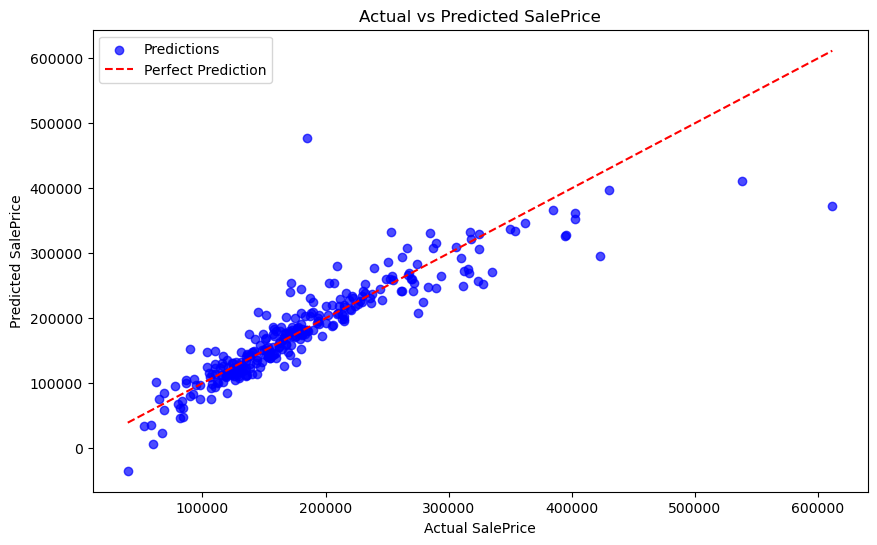

In [211]:
# Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('A3_house_prices_train.csv')

# Inspect the dataset
print(df.head())       # View first few rows
print(df.info())       # Overview of columns, data types, and missing values
print(df.describe())   # Summary statistics for numeric columns

# Specify relevant features and target variable
features = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
    'YearBuilt', 'LotArea', 'Neighborhood', 'YearRemodAdd', 'GarageArea', 'OverallCond'
]
target = 'SalePrice'

# Drop rows with missing values in selected features or target
df_cleaned = df[features + [target]].dropna()

# Create an instance of OneHotEncoder (use sparse_output=False for newer versions)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply OneHotEncoder to the 'Neighborhood' column
neighborhood_encoded = encoder.fit_transform(df_cleaned[['Neighborhood']])

# Convert to a dense array and create a DataFrame
neighborhood_encoded_df = pd.DataFrame(
    neighborhood_encoded.astype('uint8'), 
    columns=encoder.get_feature_names_out(['Neighborhood']),
    index=df_cleaned.index 
)

# Concatenate the encoded neighborhood DataFrame with the original DataFrame
df_encoded = pd.concat([df_cleaned.drop('Neighborhood', axis=1), neighborhood_encoded_df], axis=1)

# Define features (X) and target variable (y)
X = df_encoded.drop('SalePrice', axis=1) 
y = df_encoded['SalePrice']             

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_train_pred = model.predict(X_train)  # Predictions on training data
y_test_pred = model.predict(X_test)    # Predictions on testing data

# Evaluate the Model
# Calculate metrics for training data
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = sqrt(mse_train)

# Calculate metrics for testing data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)

# Print evaluation metrics
print("Training Performance:")
print(f"MAE: {mae_train}, MSE: {mse_train}, RMSE: {rmse_train}")

print("\nTesting Performance:")
print(f"MAE: {mae_test}, MSE: {mse_test}, RMSE: {rmse_test}")


# Visualize Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='b', label='Predictions')  # Actual vs Predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')  # Perfect prediction line
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()



#### Line Plot: 

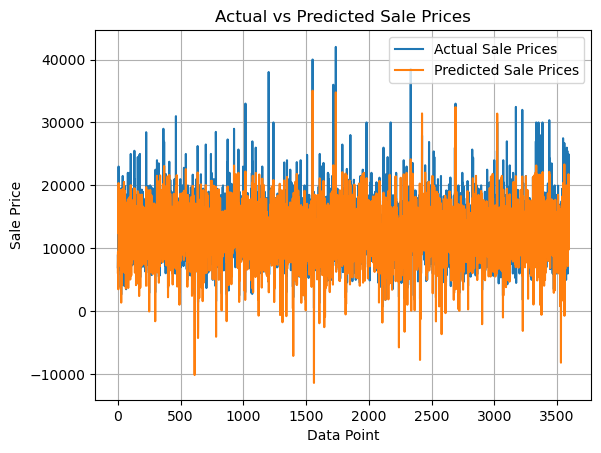

In [215]:
# Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('A3_house_prices_train.csv')

# Create the plot
plt.plot(range(len(y_test)), y_test, label='Actual Sale Prices')
plt.plot(range(len(y_test)), y_pred, label='Predicted Sale Prices')

# Label the axes
plt.xlabel('Data Point')
plt.ylabel('Sale Price')

# Add a title to the plot
plt.title('Actual vs Predicted Sale Prices')

# Display the legend to differentiate between the two lines
plt.legend()

# Add gridlines for better visualization
plt.grid(True)
plt.show()


#### Histogram:

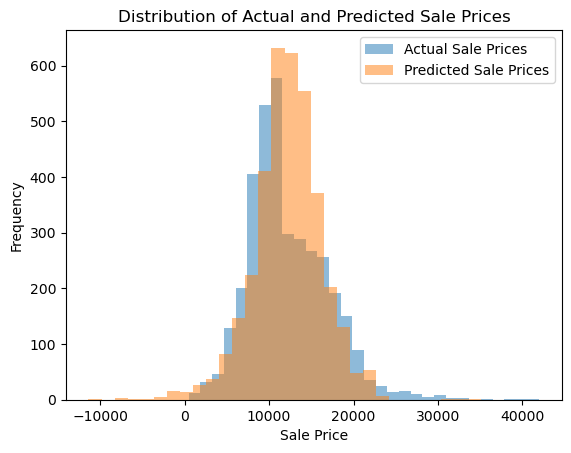

In [217]:
# Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('A3_house_prices_train.csv')

# Create the histogram
plt.hist(y_test, bins=30, alpha=0.5, label='Actual Sale Prices')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted Sale Prices')

# Label the axes
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

# Add a title to the plot
plt.title('Distribution of Actual and Predicted Sale Prices')

# Display the legend to differentiate between the two distributions
plt.legend()

# Show the plot
plt.show()

#### Box Plot: 

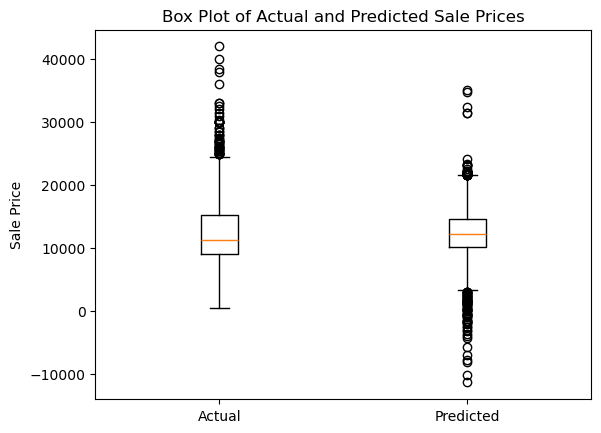

In [219]:
# Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('A3_house_prices_train.csv')

# Create the box plot
plt.boxplot([y_test, y_pred], labels=['Actual', 'Predicted'])

# Label the y-axis
plt.ylabel('Sale Price')

# Add a title to the plot
plt.title('Box Plot of Actual and Predicted Sale Prices')

# Display the plot
plt.show()

#### Residual Plot:

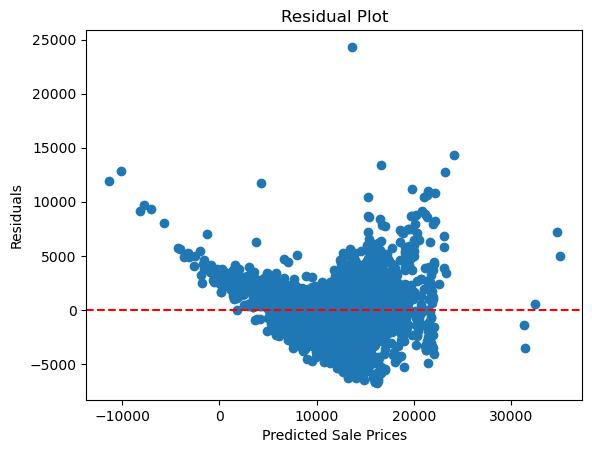

In [221]:
# Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('A3_house_prices_train.csv')

# Calculate residuals (difference between actual and predicted values)
residuals = y_test - y_pred

# Create the residual plot
plt.scatter(y_pred, residuals)

# Label the x-axis
plt.xlabel('Predicted Sale Prices')

# Label the y-axis
plt.ylabel('Residuals')

# Add a title to the plot
plt.title('Residual Plot')

# Add a horizontal line at y=0 for reference (zero residuals)
plt.axhline(y=0, color='r', linestyle='--')

# Display the plot
plt.show()

## 2. train a model on the following dataset of Ford cars

In [213]:
# Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('A3_ford.csv')

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Check columns after stripping to confirm
print("Columns after stripping:", df.columns)
# 2. Encode string data types
# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode 'model' column
df['model_encoded'] = encoder.fit_transform(df['model'])
df.drop('model', axis=1, inplace=True)  # Drop the original 'model' column

# Encode 'transmission' column
if 'transmission' in df.columns:
    df['transmission_encoded'] = encoder.fit_transform(df['transmission'])
    df.drop('transmission', axis=1, inplace=True)  # Drop the original 'transmission' column

# Encode 'fuelType' column
if 'fuelType' in df.columns:
    df['fuelType_encoded'] = encoder.fit_transform(df['fuelType'])
    df.drop('fuelType', axis=1, inplace=True)  # Drop the original 'fuelType' column

# Check the dataset again to confirm all columns are now numeric
print("\nDataset info after encoding:")
print(df.info())

# display the first few rows to check the results
print("\nEncoded Dataset (first few rows):")
print(df.head())
### 3. Split data into training and testing sets
# Define features (X) and target variable (y)
X = df.drop('price', axis=1)  
y = df['price'] 

# Check the shapes of X and y before the split
print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

### 4. Create an instance of the LinearRegression class and fit the model to the training data
# Instantiate the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Print model details 
print("\nLinear Regression Model trained successfully.")
print("\nIntercept:", model.intercept_)
print("\nCoefficients:", model.coef_)

### 5. Make predictions on the testing set
# Step 1: Make Predictions on the testing set
y_pred = model.predict(X_test)

# Print the shape of predictions
print("\nShape of Predictions:", y_pred.shape)

### 6. Evaluate the performance of the model using MAE, MSE, and RMSE
#  Evaluate performance of the model using MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Compare with the statistics of the full dataset
price_mean = df['price'].mean()
price_std = df['price'].std()

print("\nPrice Summary from Full Dataset:")
print(f"Mean Price: {price_mean}")
print(f"Standard Deviation of Price: {price_std}")



Columns after stripping: Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

Dataset info after encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  17966 non-null  int64  
 1   price                 17966 non-null  int64  
 2   mileage               17966 non-null  int64  
 3   tax                   17966 non-null  int64  
 4   mpg                   17966 non-null  float64
 5   engineSize            17966 non-null  float64
 6   model_encoded         17966 non-null  int32  
 7   transmission_encoded  17966 non-null  int32  
 8   fuelType_encoded      17966 non-null  int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 1.0 MB
None

Encoded Dataset (first few rows):
   year  price  mileage  tax   mpg  engineSize

### 9. Visualizing the results


#### Scatter Plot: 

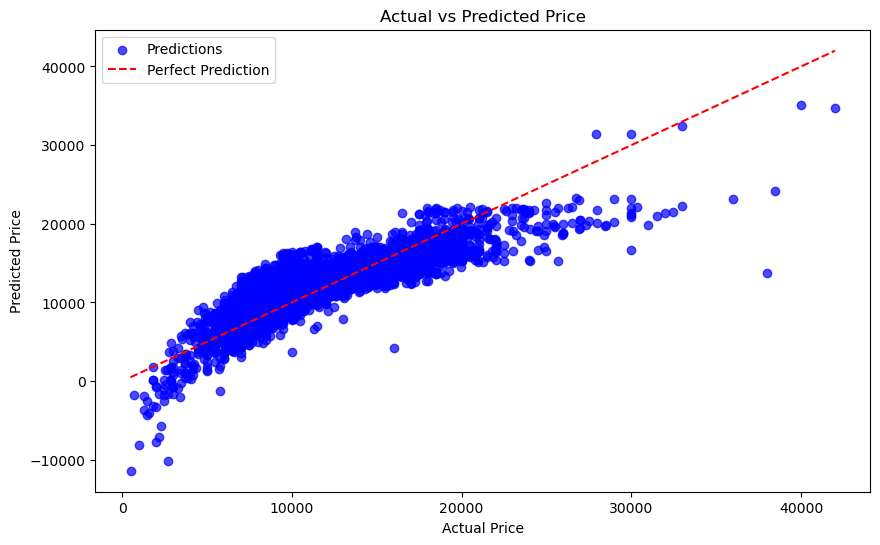

In [195]:
# Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('A3_ford.csv')


#  Create a scatter plot of actual vs predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predictions') 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')  # Perfect prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()

#### Line Plot: 

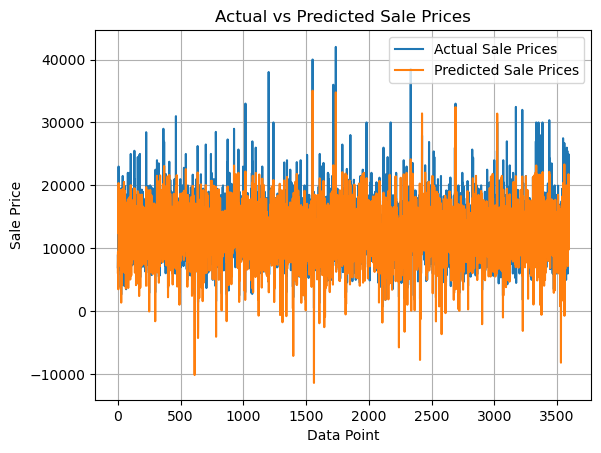

In [197]:
# Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('A3_ford.csv')

# Create the plot
plt.plot(range(len(y_test)), y_test, label='Actual Sale Prices')
plt.plot(range(len(y_test)), y_pred, label='Predicted Sale Prices')

# Label the axes
plt.xlabel('Data Point')
plt.ylabel('Sale Price')

# Add a title to the plot
plt.title('Actual vs Predicted Sale Prices')

# Display the legend to differentiate between the two lines
plt.legend()

# Add gridlines for better visualization
plt.grid(True)
plt.show()

#### Histogram:

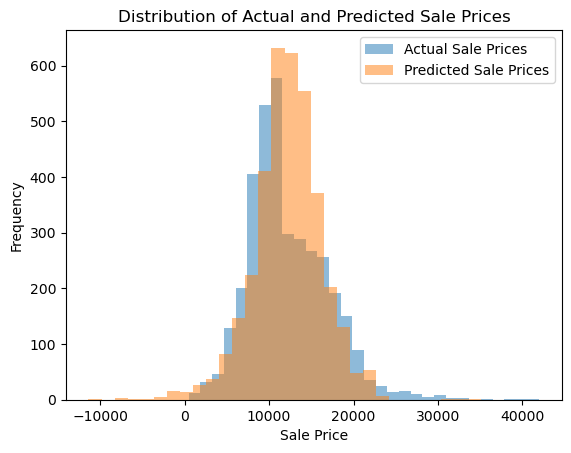

In [199]:

# Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('A3_ford.csv')



# Create the histogram
plt.hist(y_test, bins=30, alpha=0.5, label='Actual Sale Prices')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted Sale Prices')

# Label the axes
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

# Add a title to the plot
plt.title('Distribution of Actual and Predicted Sale Prices')

# Display the legend to differentiate between the two distributions
plt.legend()

# Show the plot
plt.show()

#### Box Plot: 

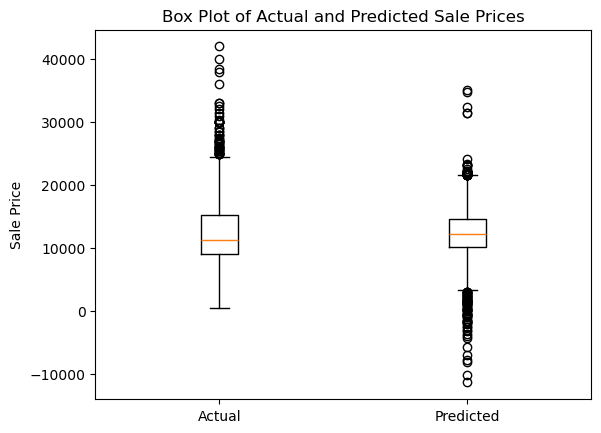

In [201]:
# Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('A3_ford.csv')

# Create the box plot
plt.boxplot([y_test, y_pred], labels=['Actual', 'Predicted'])

# Label the y-axis
plt.ylabel('Sale Price')

# Add a title to the plot
plt.title('Box Plot of Actual and Predicted Sale Prices')

# Display the plot
plt.show()


#### Residual Plot:

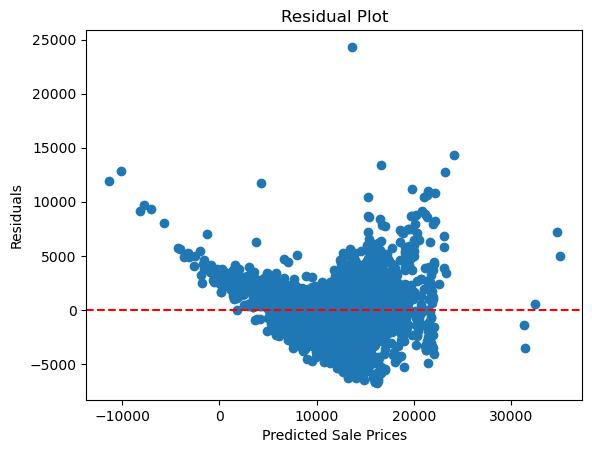

In [203]:
# Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('A3_ford.csv')


# Calculate residuals (difference between actual and predicted values)
residuals = y_test - y_pred

# Create the residual plot
plt.scatter(y_pred, residuals)

# Label the x-axis
plt.xlabel('Predicted Sale Prices')

# Label the y-axis
plt.ylabel('Residuals')

# Add a title to the plot
plt.title('Residual Plot')

# Add a horizontal line at y=0 for reference (zero residuals)
plt.axhline(y=0, color='r', linestyle='--')

# Display the plot
plt.show()